In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
dataset = yf.download('AAPL',period='10y')
dataset=pd.DataFrame(dataset)

[*********************100%***********************]  1 of 1 completed


In [ ]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-05-02,15.777857,16.021070,15.736786,15.911429,13.742403,421828400
2013-05-03,16.118214,16.186787,16.041071,16.070715,13.879973,361300800
2013-05-06,16.275356,16.507143,16.225357,16.453930,14.210950,496641600
2013-05-07,16.606071,16.633928,16.203571,16.380714,14.147708,483753200
2013-05-08,16.394285,16.620358,16.278929,16.565714,14.307495,472598000


Text(0, 0.5, 'Closing Price')

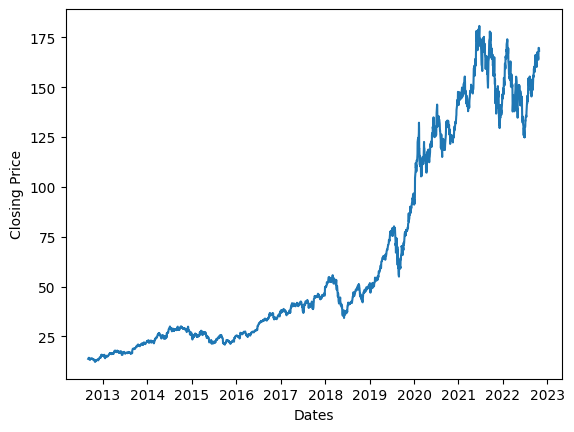

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
plt.gca().xaxis.set_major_locator(mdate.DayLocator(interval=360))
plt.plot(dataset.index,dataset['Adj Close'])
plt.xlabel('Dates')
plt.ylabel('Closing Price')

In [ ]:
#Scaling the data because LSTM will perfrom better on normalized data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
data = scale.fit_transform(np.array(dataset['Adj Close']).reshape(-1,1))
data

array([[0.00899676],
       [0.00981341],
       [0.01177816],
       ...,
       [0.93467844],
       [0.9341442 ],
       [0.92607092]])

In [ ]:
train_size = int(len(data)*0.75)
test_size = len(data)-train_size
train_size,test_size

(1888, 630)

In [ ]:
train_data = data[0:train_size,:1]
test_data = data[train_size:len(data),:1]
train_data

array([[0.00899676],
       [0.00981341],
       [0.01177816],
       ...,
       [0.60009149],
       [0.60915403],
       [0.57758134]])

In [ ]:
test_data

array([[0.60167011],
       [0.56389987],
       [0.5633736 ],
       [0.57313777],
       [0.59950684],
       [0.62336169],
       [0.62257111],
       [0.60869026],
       [0.60664036],
       [0.62725652],
       [0.62561662],
       [0.62590951],
       [0.63200073],
       [0.62667093],
       [0.61870548],
       [0.62227826],
       [0.61466422],
       [0.59422378],
       [0.6019548 ],
       [0.60699176],
       [0.61027161],
       [0.62467953],
       [0.64617423],
       [0.64828275],
       [0.64746277],
       [0.64342161],
       [0.65220684],
       [0.65589661],
       [0.64066871],
       [0.64921979],
       [0.64435861],
       [0.64066871],
       [0.67639574],
       [0.67598569],
       [0.68119824],
       [0.66925036],
       [0.67844552],
       [0.69982319],
       [0.69443497],
       [0.70035027],
       [0.72799484],
       [0.71733524],
       [0.71059991],
       [0.70456721],
       [0.68535666],
       [0.69472781],
       [0.66889887],
       [0.694

In [ ]:
len(train_data),len(test_data)

(1888, 630)

In [ ]:
def create(dataset,steps):
  x,y = [],[]
  for i in range(len(dataset)-steps-1):
    a = dataset[i:(i+steps),0]
    x.append(a)
    y.append(dataset[i+steps,0])
  return np.array(x),np.array(y)

In [ ]:
X_train,y_train = create(train_data,100)
X_test,y_test = create(test_data,100)

In [ ]:
X_train

array([[0.00899676, 0.00981341, 0.01177816, ..., 0.0150476 , 0.0141403 ,
        0.01845035],
       [0.00981341, 0.01177816, 0.01140274, ..., 0.0141403 , 0.01845035,
        0.0181646 ],
       [0.01177816, 0.01140274, 0.01235127, ..., 0.01845035, 0.0181646 ,
        0.01676009],
       ...,
       [0.40179022, 0.39770485, 0.41109901, ..., 0.61447464, 0.61073266,
        0.60418429],
       [0.39770485, 0.41109901, 0.41395879, ..., 0.61073266, 0.60418429,
        0.60003297],
       [0.41109901, 0.41395879, 0.42932274, ..., 0.60418429, 0.60003297,
        0.60009149]])

In [ ]:
X_train.shape,X_test.shape

((1787, 100), (529, 100))

In [ ]:
#Reshaping the array in the format which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
X_train.shape,X_test.shape

((1787, 100, 1), (529, 100, 1))

In [ ]:
# Importing necessary libraries for our stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=50,verbose=1)

Epoch 1/50
36/36 [==============================] - 16s 263ms/step - loss: 0.0062 - val_loss: 0.0091
Epoch 2/50
36/36 [==============================] - 7s 206ms/step - loss: 4.6916e-04 - val_loss: 0.0024
Epoch 3/50
36/36 [==============================] - 9s 262ms/step - loss: 2.9714e-04 - val_loss: 0.0028
Epoch 4/50
36/36 [==============================] - 9s 242ms/step - loss: 2.7387e-04 - val_loss: 0.0019
Epoch 5/50
36/36 [==============================] - 8s 209ms/step - loss: 2.5114e-04 - val_loss: 0.0017
Epoch 6/50
36/36 [==============================] - 12s 340ms/step - loss: 2.1889e-04 - val_loss: 0.0021
Epoch 7/50
36/36 [==============================] - 8s 209ms/step - loss: 2.2721e-04 - val_loss: 0.0022
Epoch 8/50
36/36 [==============================] - 7s 206ms/step - loss: 2.1129e-04 - val_loss: 0.0015
Epoch 9/50
36/36 [==============================] - 8s 228ms/step - loss: 1.9142e-04 - val_loss: 0.0022
Epoch 10/50
36/36 [==============================] - 8s 202ms/step

In [ ]:
#Prediciton of our model
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

17/17 [==============================] - 1s 53ms/step


In [ ]:
#calculate scores for model evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# calculate r2 scores for training and test sets
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# calculate mean absolute errors for training and test sets
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

# calculate mean squared errors for training and test sets
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

# calculate root mean squared errors for training and test sets
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# print scores
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{train_r2:.6f}\t\t{test_r2:.6f}
{'MAE'.ljust(10)}{train_mae:.6f}\t\t{test_mae:.6f}
{'MSE'.ljust(10)}{train_mse:.6f}\t\t{test_mse:.6f}
{'RMSE'.ljust(10)}{train_rmse:.6f}\t\t{test_rmse:.6f}
'''
print(scores)


Metric           Train                Test        
r2_score  0.995085		0.930393
MAE       0.006148		0.017126
MSE       0.000084		0.000498
RMSE      0.009182		0.022308



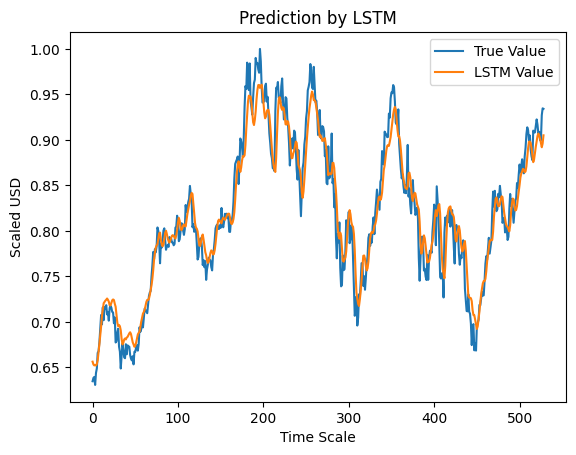

In [ ]:
plt.plot(y_test, label='True Value')
plt.plot(test_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()